___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline

#plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [6]:
df.duplicated().sum().any()

False

In [7]:
df.isnull().sum().any()

False

In [8]:
df['CustomerID'].nunique()

200

In [9]:
df.drop(["CustomerID"], axis = 1, inplace=True)

In [10]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [11]:
# # Define the mapping dictionary
# mapping = {'Male': 0, 'Female': 1}

# # Map the categorical column to 0s and 1s
# df['Gender'] = df['Gender'].map(mapping)

# # Print the mapped column
# print(df['Gender'])

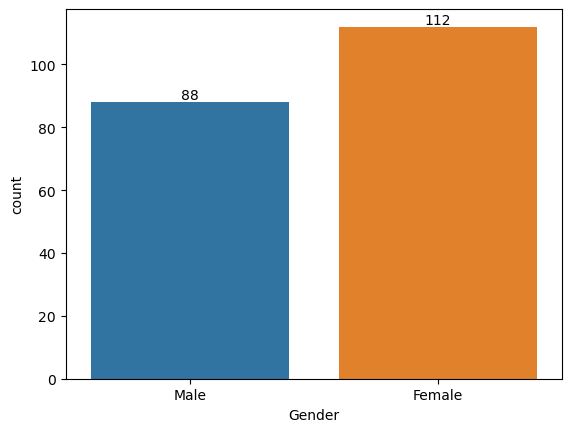

In [12]:
ax = sns.countplot(df['Gender'])
ax.bar_label(ax.containers[0]);

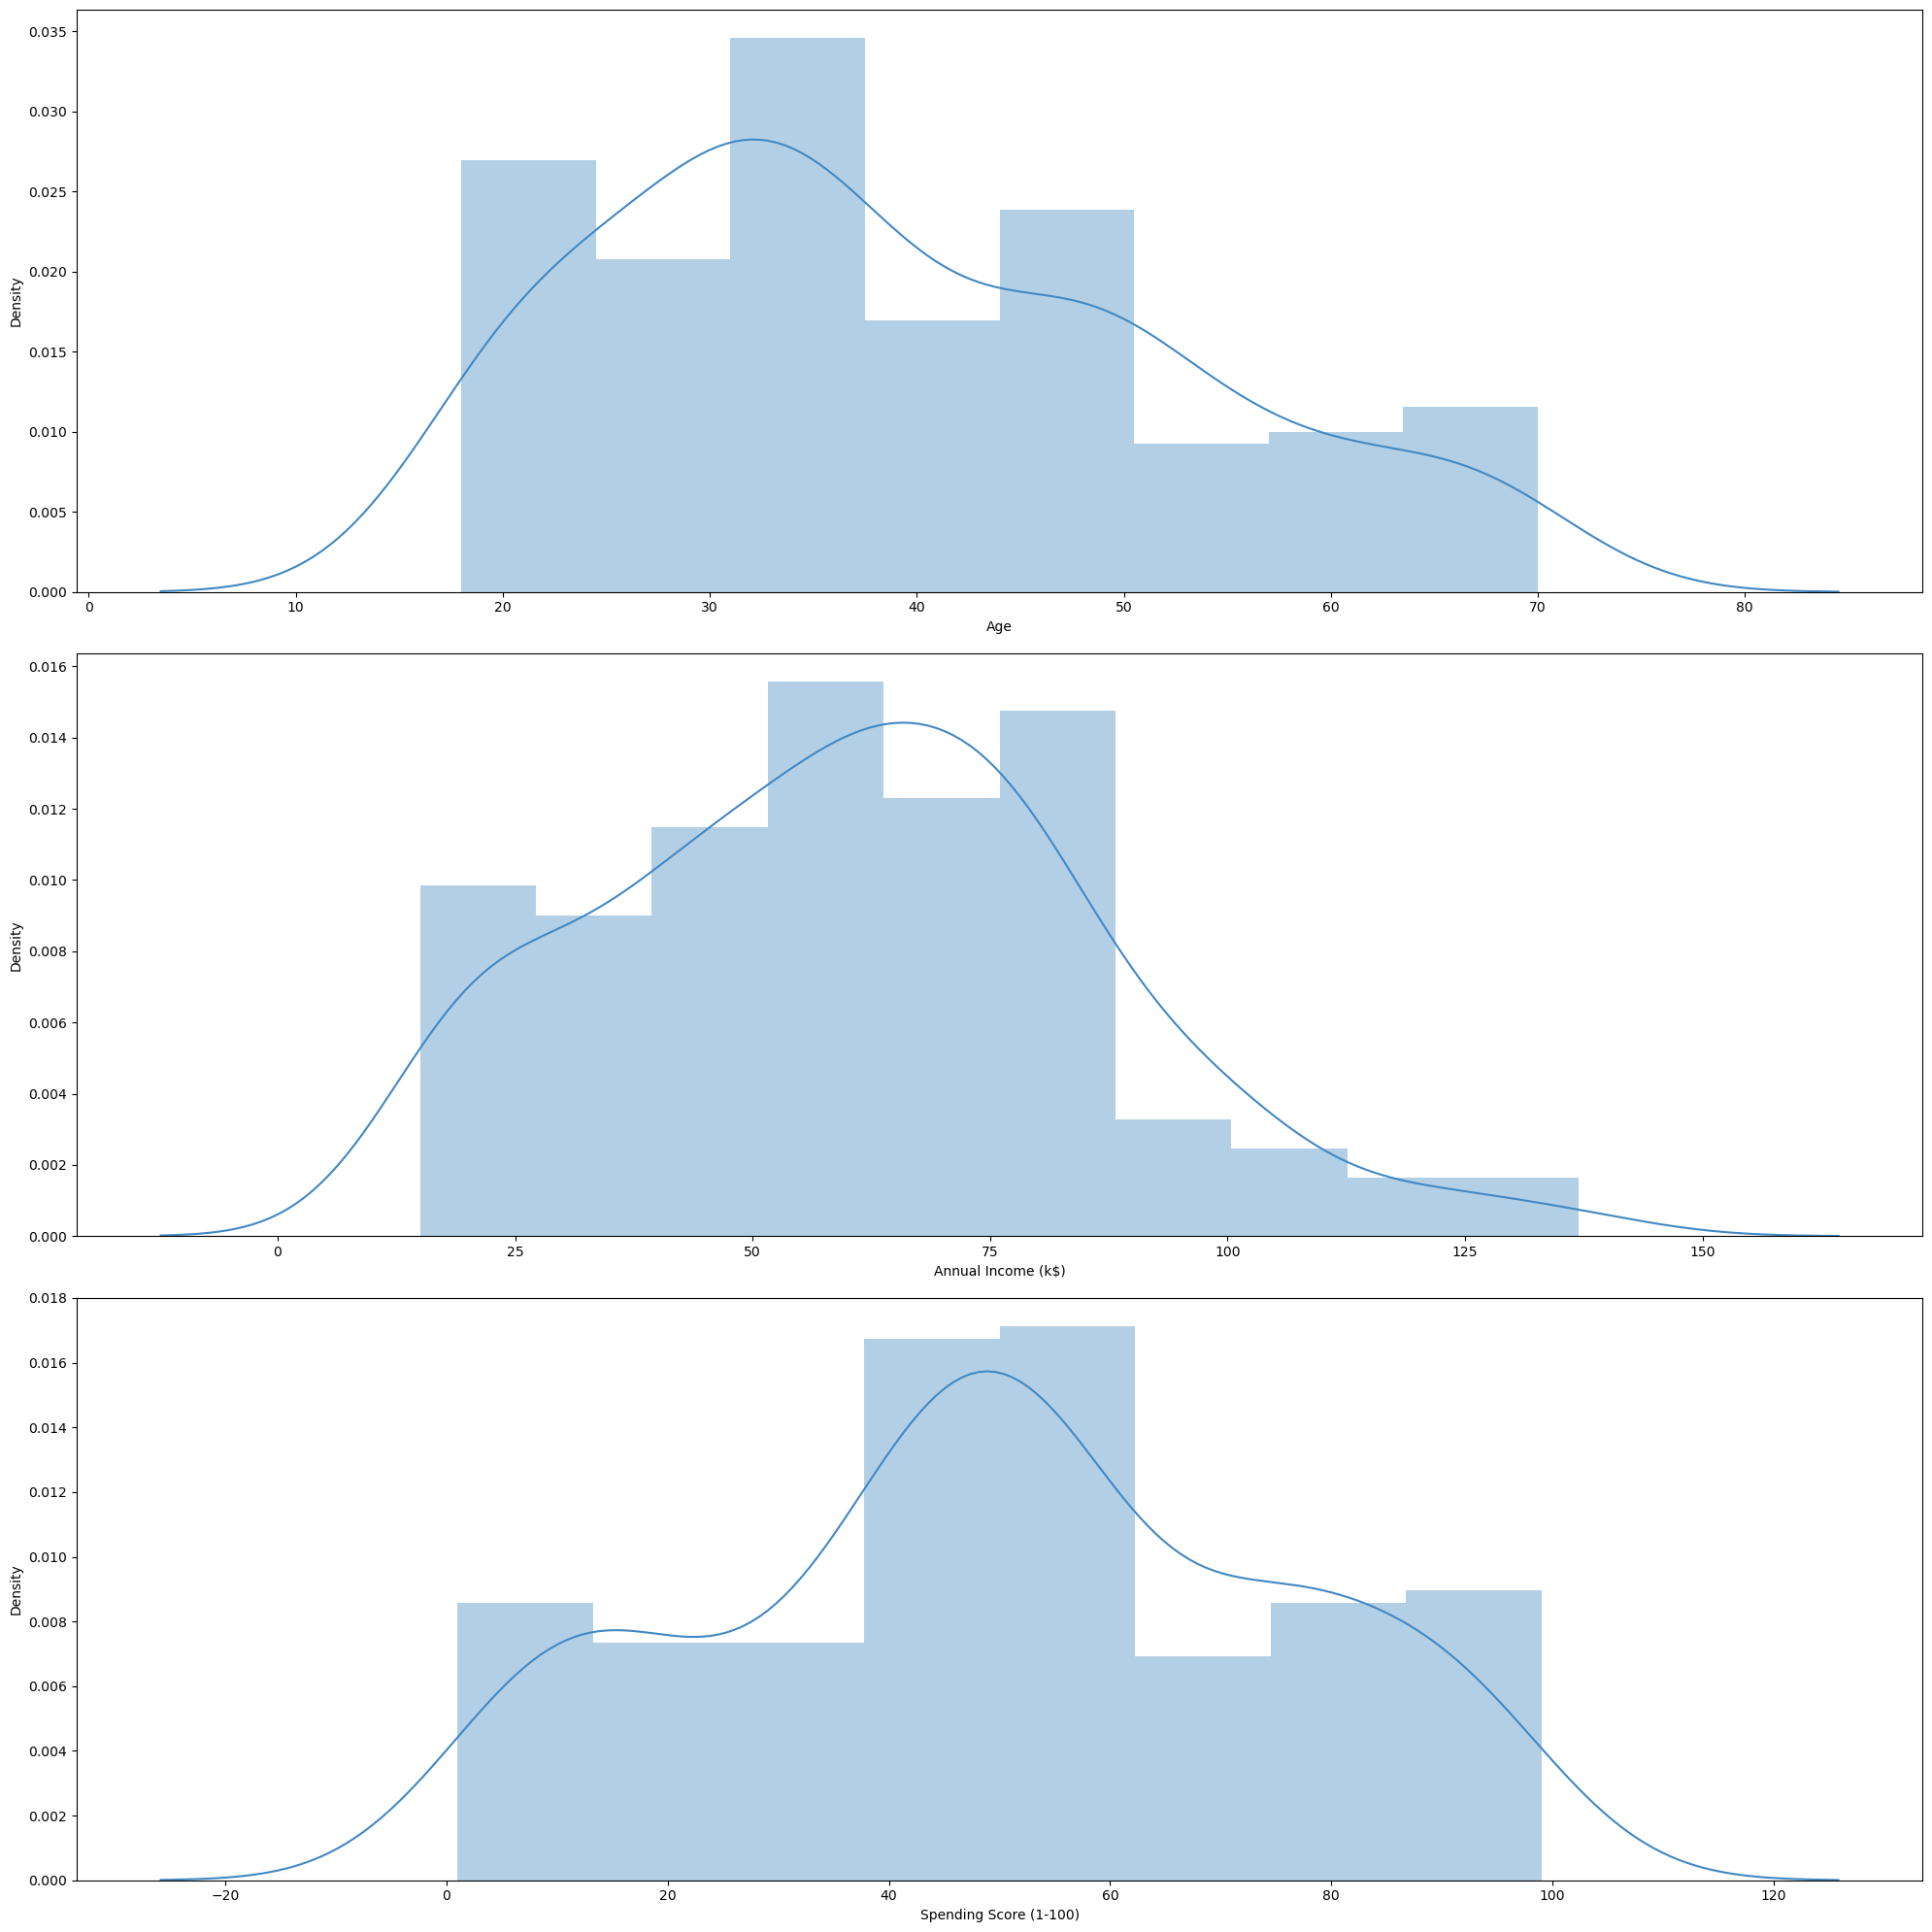

In [13]:
plt.figure(figsize = (20, 20))
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
    plt.subplot(3, 1, i+1)
    sns.distplot(df[column[i]], color="#4288c2")    #histplot,distplot
    plt.tight_layout()

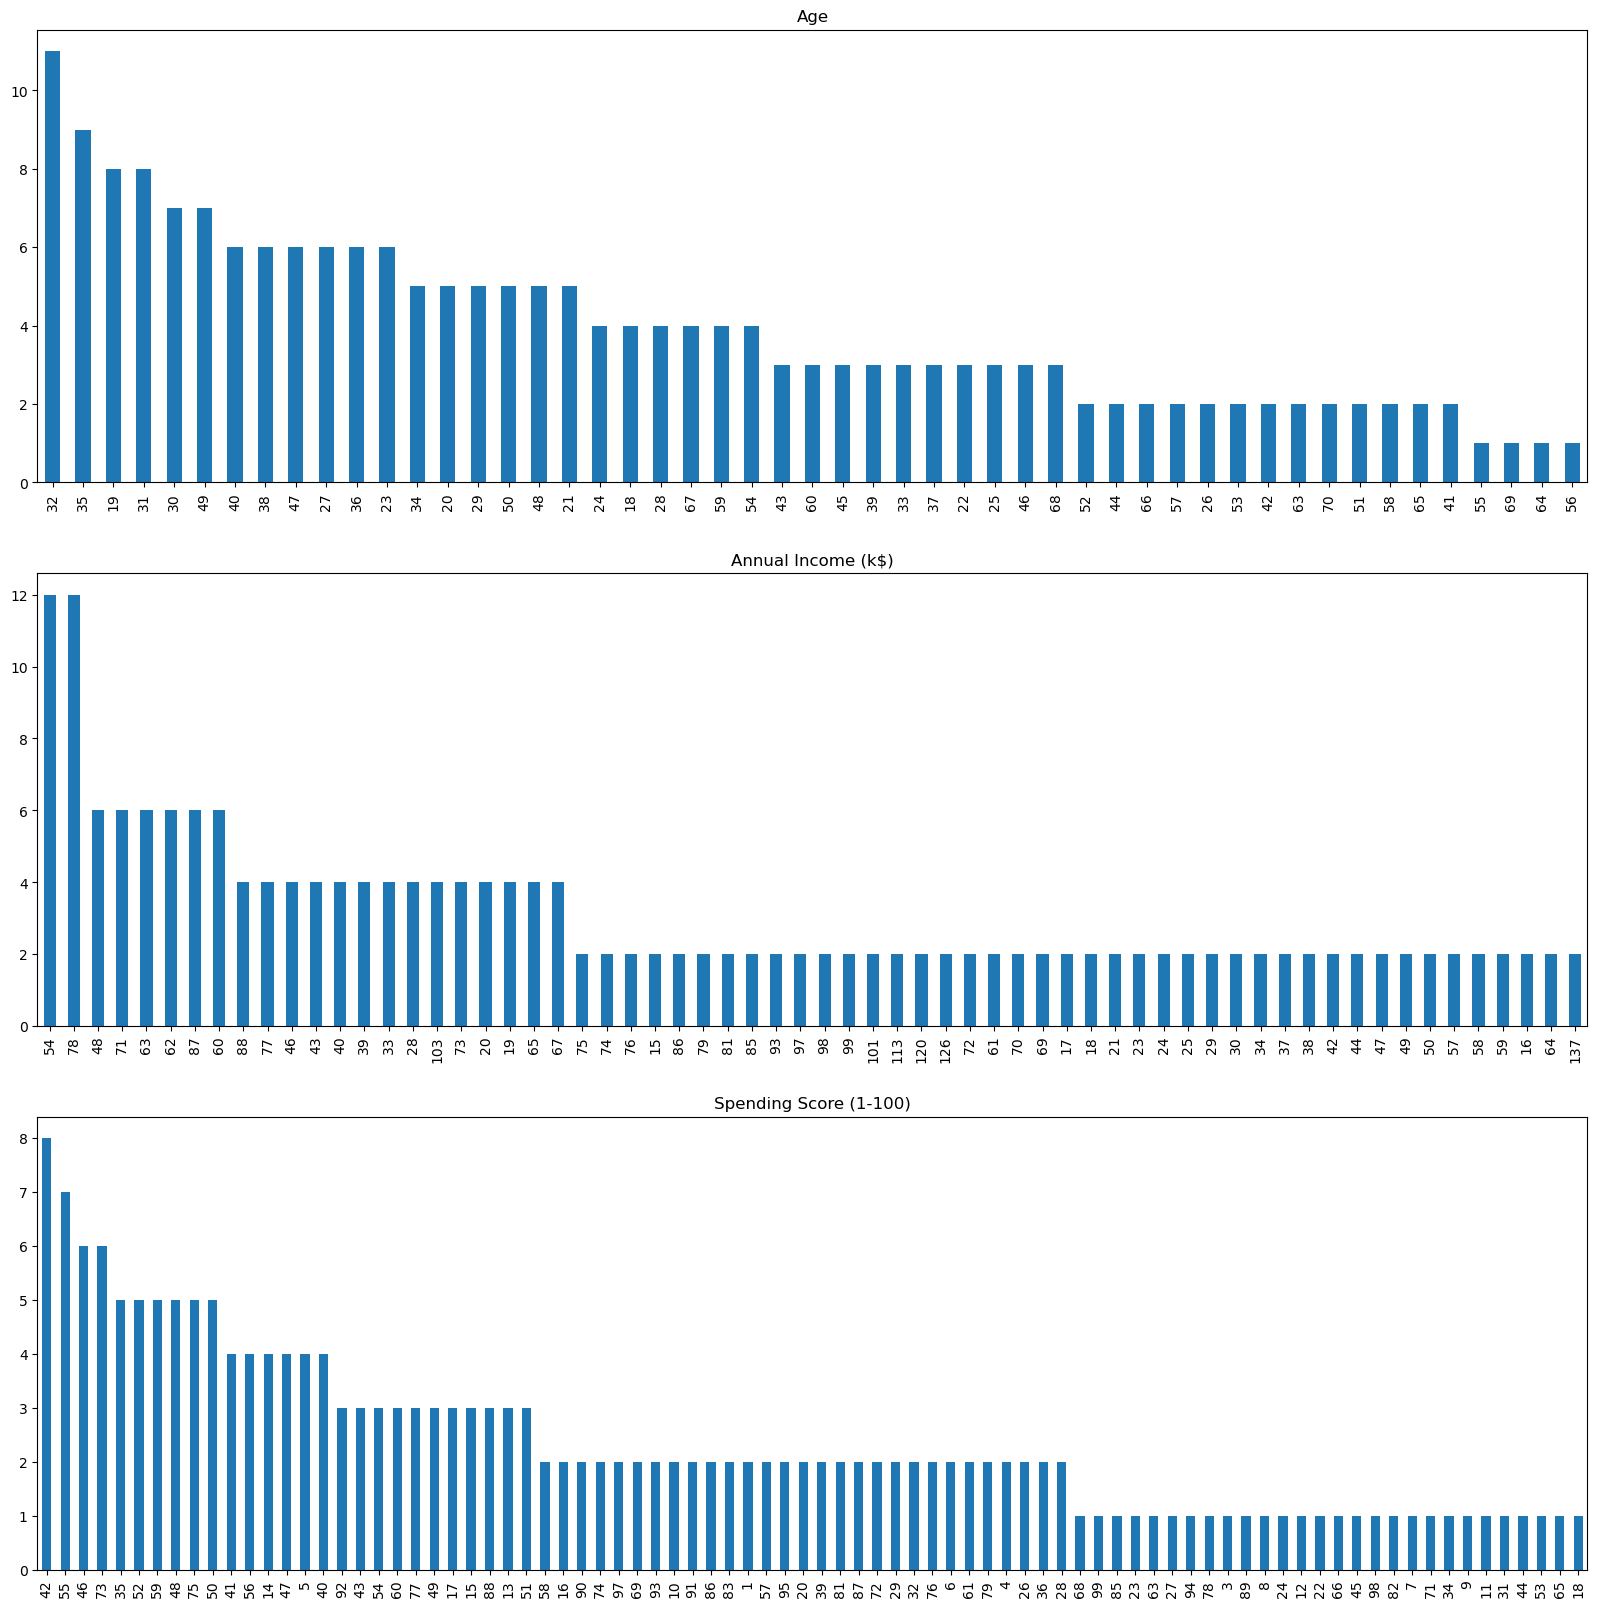

In [14]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      df[column[i]].value_counts().plot.bar(figsize = (20, 20))

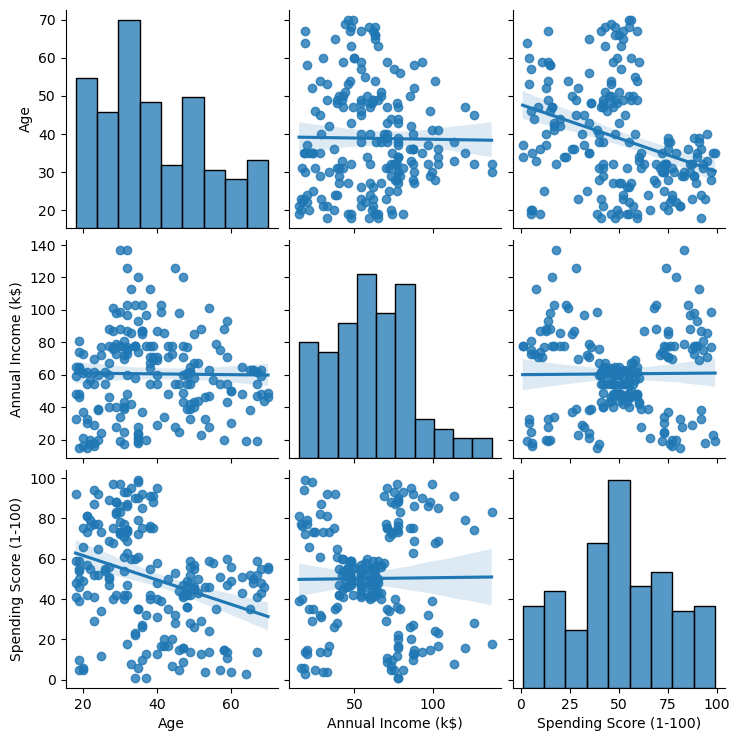

In [15]:
sns.pairplot(df, kind="reg")

<AxesSubplot:>

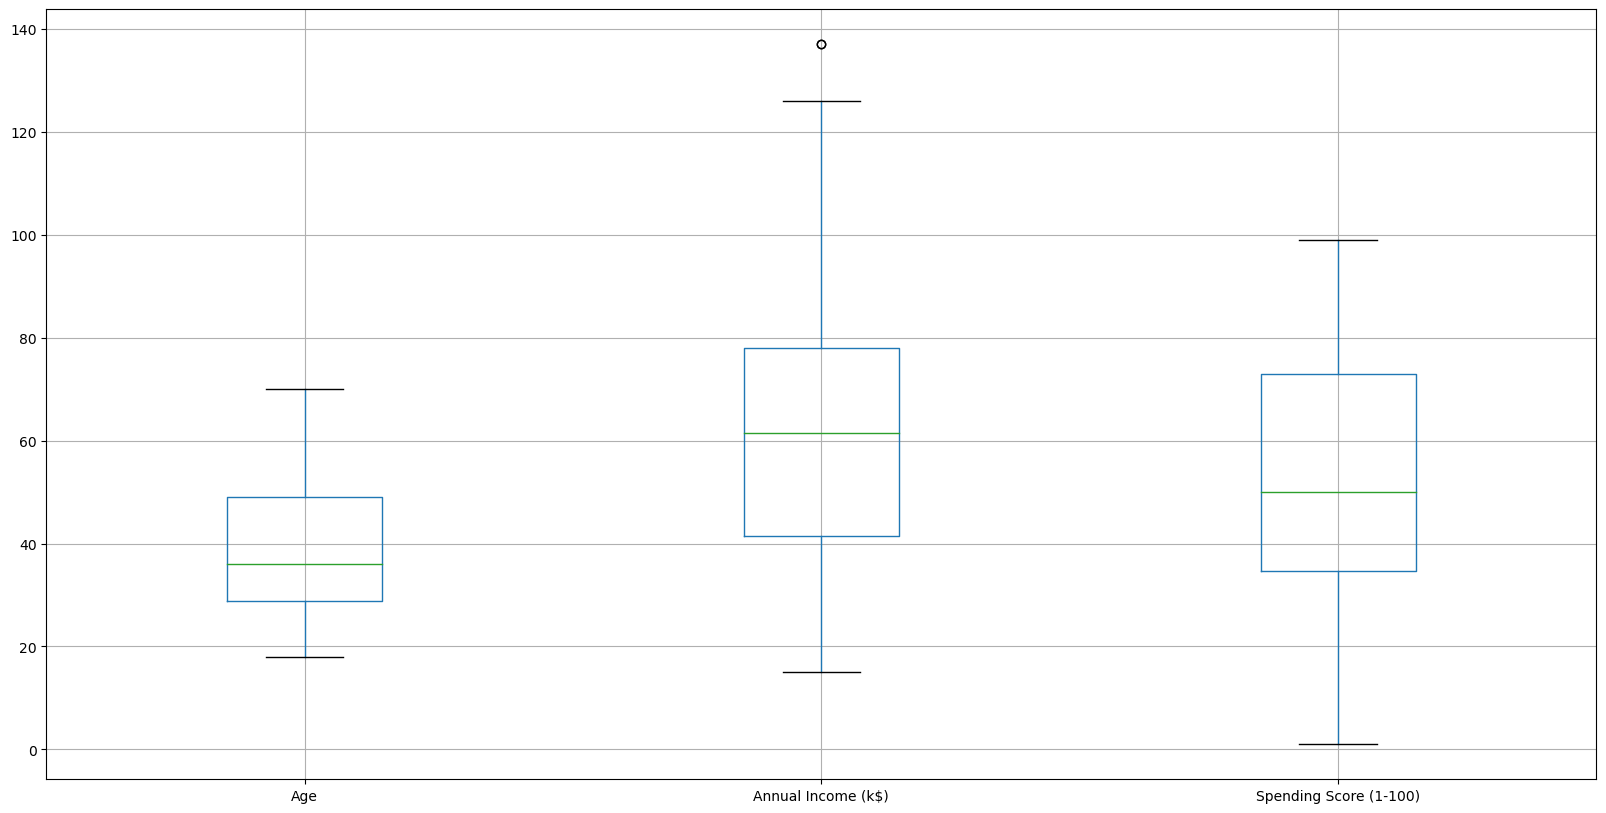

In [16]:
plt.figure(figsize =(20,10))
df.boxplot()

<AxesSubplot:>

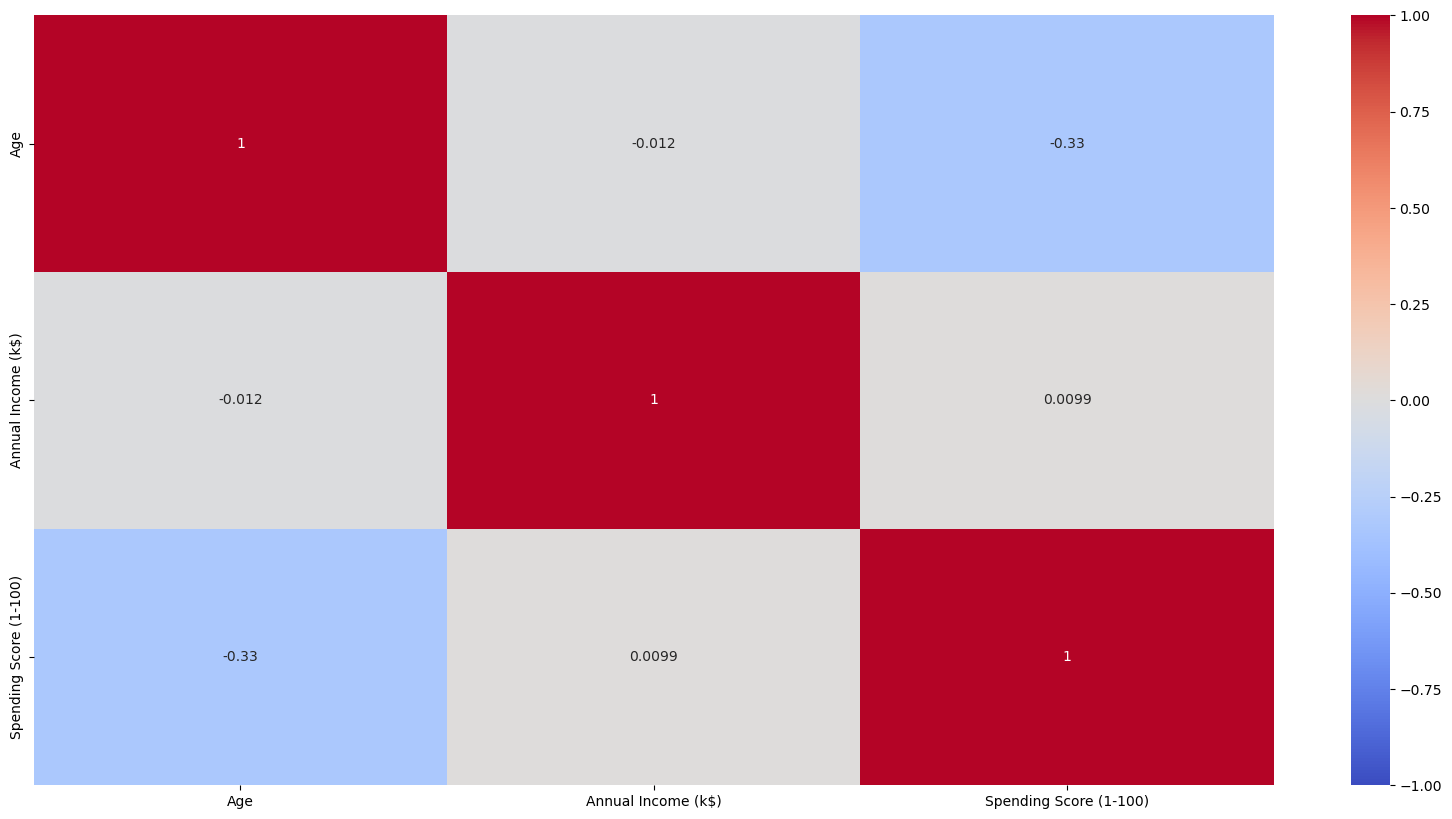

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap="coolwarm")

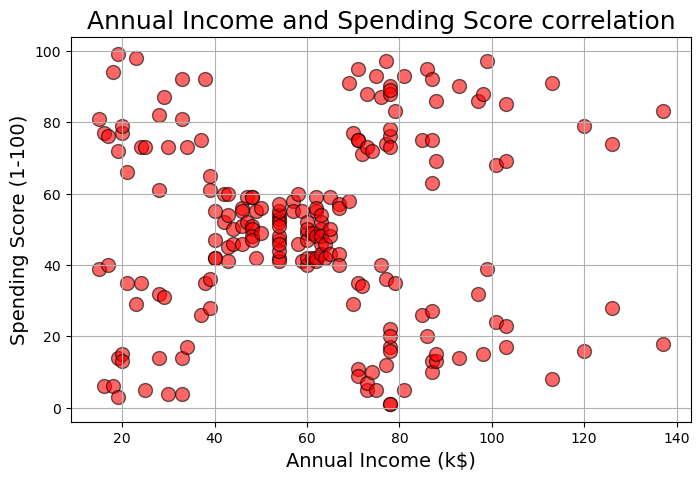

In [18]:
plt.figure(figsize=(8,5))
plt.title("Annual Income and Spending Score correlation",fontsize=18)
plt.xlabel ("Annual Income (k$)",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'],color='red',edgecolor='k',alpha=0.6, s=100)
plt.show()

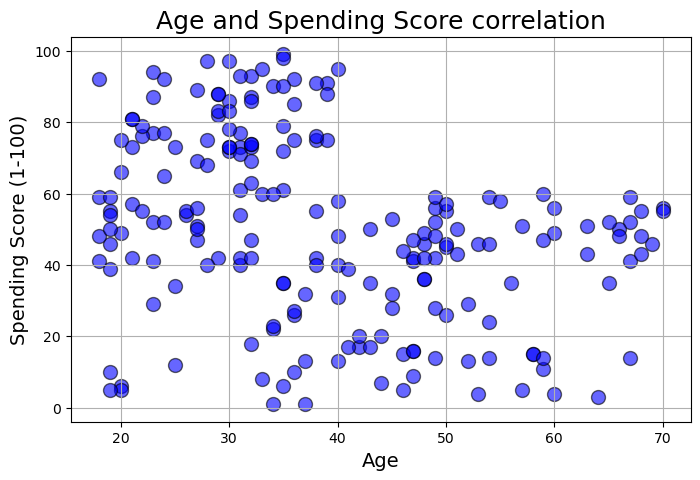

In [19]:
plt.figure(figsize=(8,5))
plt.title("Age and Spending Score correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Spending Score (1-100)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Spending Score (1-100)'],color='blue',edgecolor='k',alpha=0.6, s=100)
plt.show()

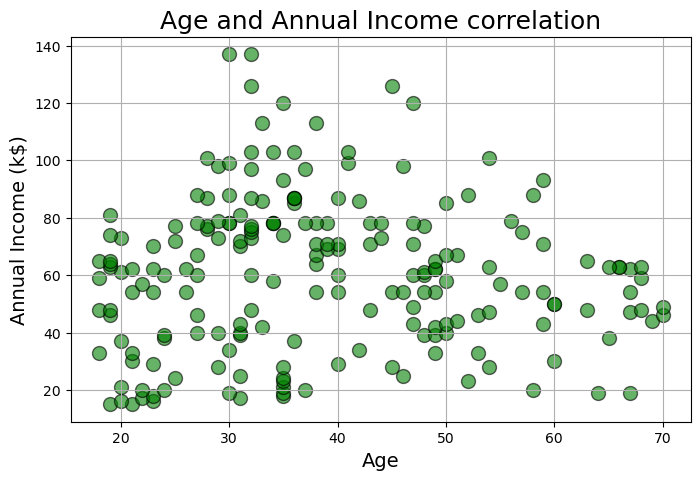

In [20]:
plt.figure(figsize=(8,5))
plt.title("Age and Annual Income correlation",fontsize=18)
plt.xlabel ("Age",fontsize=14)
plt.ylabel ("Annual Income (k$)",fontsize=14)
plt.grid(True)
plt.scatter(df['Age'],df['Annual Income (k$)'],color='green',edgecolor='k',alpha=0.6, s=100)
plt.show()

## Conclusion of EDA … 
- It seems there are no high correlations between the variables 
- Scaling seems unnecessary 
- Balanced data 
- Based on the data: customers can be segmented into 2-5 clusters

## 3. Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### K_Means Clustering

In [21]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [22]:
# hopkins(df, 1)

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [23]:
X1=df.iloc[:, [1,3]]
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [24]:
K_means_model = KMeans(n_clusters=5,random_state=42)
K_means_model.fit_predict(X1)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2], dtype=int32)

In [25]:
hopkins(X1, 1)

0.707826264960638

#### *ii. Determine optimal number of clusters*

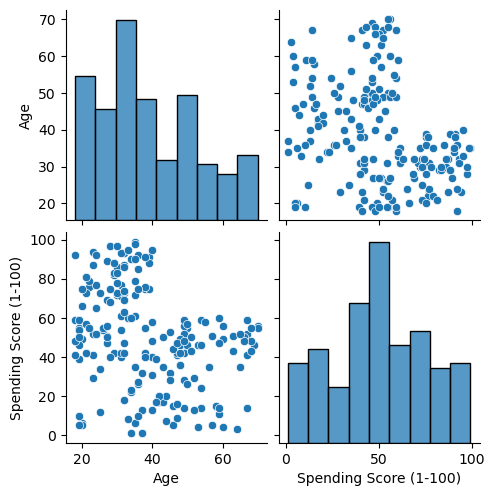

In [26]:
sns.pairplot(X1);

In [27]:
def plot_elbow_curve(X, k_range):

  # Calculate the WCSS for each value of k
  wcss = []
  for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

  # Plot the elbow curve
  plt.plot(k_range, wcss, "bo--")
  plt.title('The Elbow Method')
  plt.xlabel('Number of Clusters')
  plt.ylabel('WCSS')
  plt.show()
  print(-pd.Series(wcss).diff())

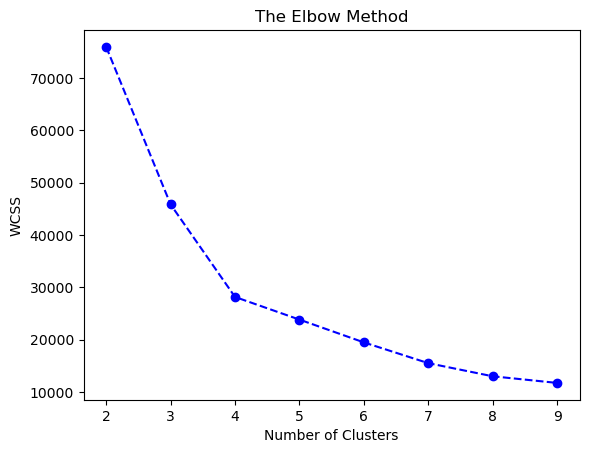

0             NaN
1    30108.479394
2    17675.093049
3     4327.334745
4     4355.130911
5     3968.924776
6     2507.709506
7     1268.463332
dtype: float64


In [28]:
# Plot the elbow curve for X1
plot_elbow_curve(X1, range(2, 10))

In [29]:
def calculate_distortion(X, k):

  # Create a KMeans object
  kmeans = KMeans(n_clusters=k, random_state=42)

  # Fit the KMeans object to the data
  kmeans.fit(X)

  # Calculate the distances from each observation to its cluster centroid
  distances = kmeans.transform(X)

  # Get the cluster labels for each observation
  labels = kmeans.labels_

  # Calculate the mean squared distance from each observation to its cluster centroid
  cluster_distances = []
    
  for r in range(k):
    cluster_distances.append(np.mean(distances[labels == r, r] ** 2))

  # Calculate the distortion of the clustering
  distortion = sum(cluster_distances)
  return distortion

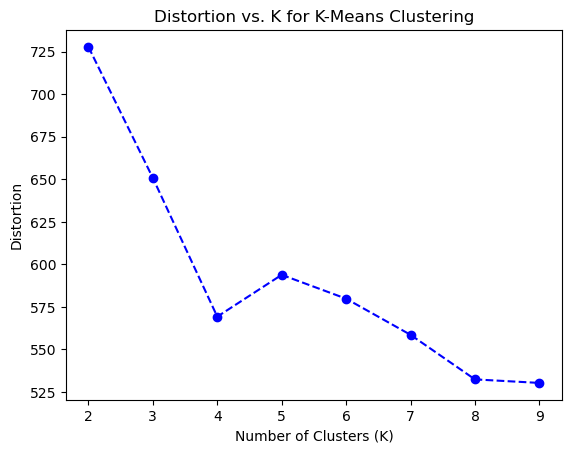

In [30]:
# Calculate the distortion for each value of k
k_range = range(2, 10)
distortion = []
for k in k_range:
  distortion.append(calculate_distortion(X1, k))

# Plot the distortion vs. k
plt.plot(k_range, distortion, "bo--")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Distortion vs. K for K-Means Clustering')
plt.show()

In [31]:
from sklearn.metrics import silhouette_score

silhouette_score(X1, K_means_model.labels_)

0.43350225495428363

In [32]:
# pip install yellowbrick

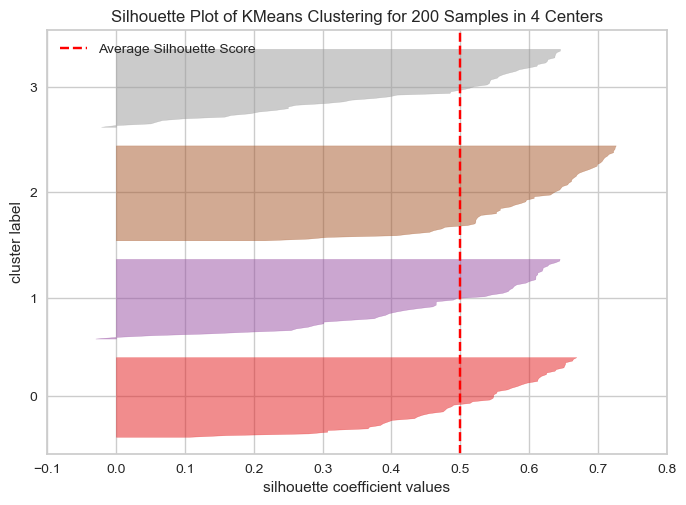

In [33]:
from yellowbrick.cluster import SilhouetteVisualizer

model_4 = KMeans(n_clusters=4, random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();


In [34]:
for i in range(4):
    label = (model_4.labels_== i)
    print(f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.5091299145013191
mean silhouette score for label 1     : 0.45429047261675404
mean silhouette score for label 2     : 0.5960779476836082
mean silhouette score for label 3     : 0.4197289676734112
mean silhouette score for all labels : 0.49973941540141753


#### Why silhouette_score is negative?

![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [35]:
K_means_model = KMeans(n_clusters=4,random_state=42)
K_means_model.fit_predict(X1)

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [36]:
df_X1 = X1.copy()
df_X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [37]:
clusters = K_means_model.labels_
clusters

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [38]:
X1.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [39]:
df_X1["cluster_Kmeans"] = clusters
df_X1

,Age,Spending Score (1-100),cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,1
3,23,77,2
4,31,40,3
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,1


#### *iv. Visualizing and Labeling All the Clusters*

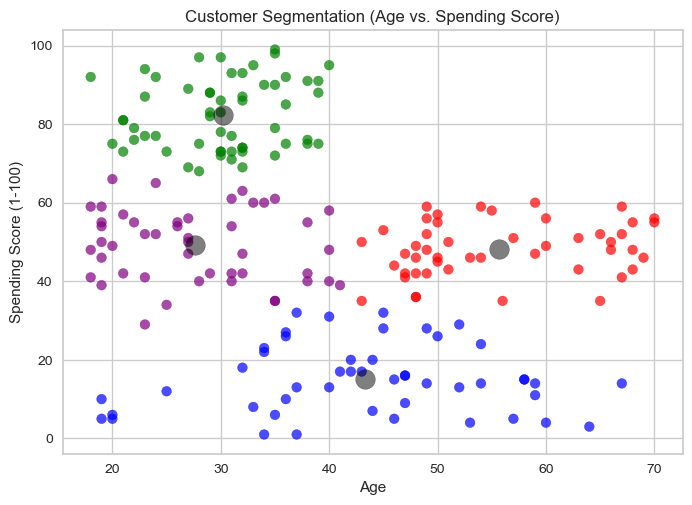

In [40]:
import matplotlib.pyplot as plt

# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange', 5: 'gray'}
centers = K_means_model.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X1['Age'],
            X1['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in df_X1.cluster_Kmeans],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()

In [41]:
labels={0:'old med spenders', 1:'diverse low spenders', 2:'young high spenders', 3:'young med spenders'}

X1['Meaningful Labels']=df_X1['cluster_Kmeans'].map(labels)

X1.head()

,Age,Spending Score (1-100),Meaningful Labels
0,19,39,young med spenders
1,21,81,young high spenders
2,20,6,diverse low spenders
3,23,77,young high spenders
4,31,40,young med spenders


### Clustering based on Annual Income and Spending Score

In [42]:
X2=df.iloc[:, [2,3]]

X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [43]:
K_means_model_2 = KMeans(n_clusters=5,random_state=42)
K_means_model_2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [44]:
hopkins(X2, 1)

0.6922240595303097

#### *ii. Determine optimal number of clusters*

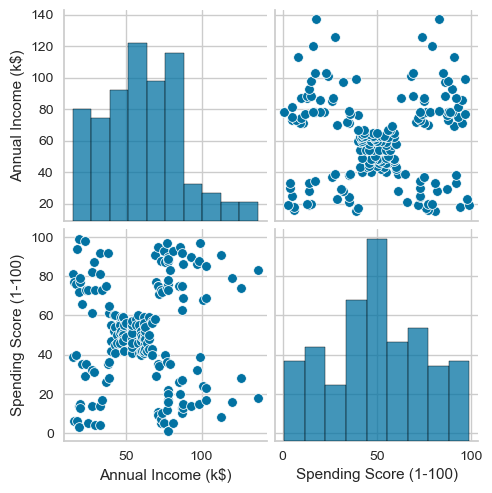

In [45]:
sns.pairplot(X2)

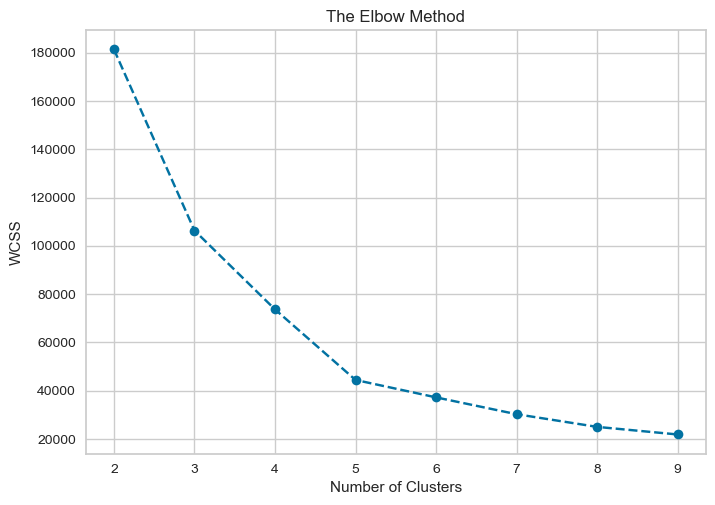

0             NaN
1    75015.222897
2    32668.584023
3    29231.333592
4     7214.640937
5     6974.157303
6     5247.817858
7     3149.746677
dtype: float64


In [46]:
# Plot the elbow curve for X1
plot_elbow_curve(X2, range(2, 10))

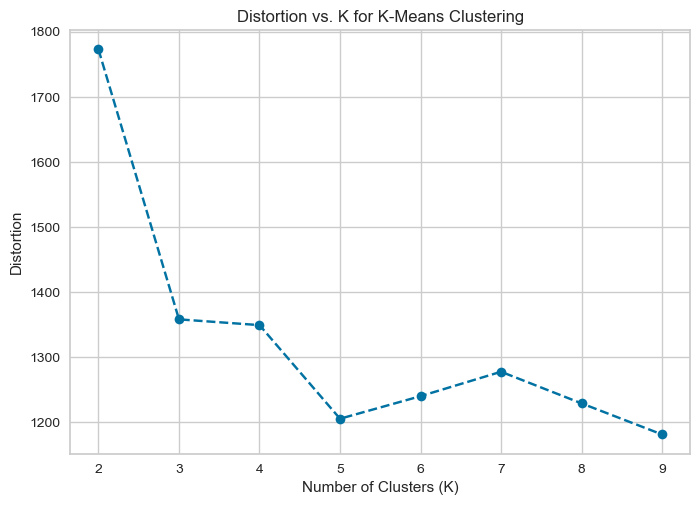

In [47]:
# Calculate the distortion for each value of k
k_range = range(2, 10)
distortion = []
for k in k_range:
  distortion.append(calculate_distortion(X2, k))

# Plot the distortion vs. k
plt.plot(k_range, distortion, "bo--")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Distortion')
plt.title('Distortion vs. K for K-Means Clustering')
plt.show()

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(X2, K_means_model_2.labels_)

0.553931997444648

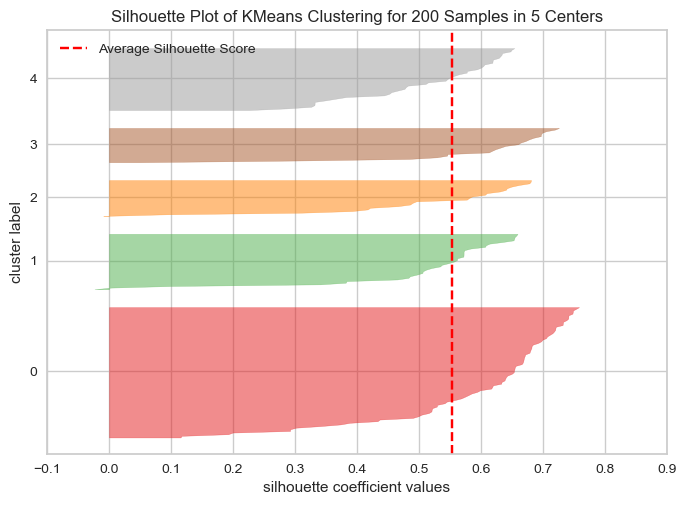

In [49]:
from yellowbrick.cluster import SilhouetteVisualizer

model_5 = KMeans(n_clusters=5,random_state=42)          # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_5)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [50]:
for i in range(5):
    label = (model_5.labels_== i)
    print(f"mean silhouette score for label {i:<6} : {visualizer.silhouette_samples_[label].mean()}")
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0      : 0.5966512190217801
mean silhouette score for label 1      : 0.5039873487056818
mean silhouette score for label 2      : 0.5122676140736505
mean silhouette score for label 3      : 0.5990128687006722
mean silhouette score for label 4      : 0.5091706489322517
mean silhouette score for all labels : 0.553931997444648


#### *iii. Apply K Means*

In [51]:
K_means_model_2 = KMeans(n_clusters=5,random_state=42)
K_means_model_2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [52]:
df_X2 = X2.copy()
df_X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [53]:
clusters_2 = K_means_model_2.labels_
clusters_2

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [54]:
X2.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [55]:
df_X2["cluster_Kmeans"] = clusters_2
df_X2

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

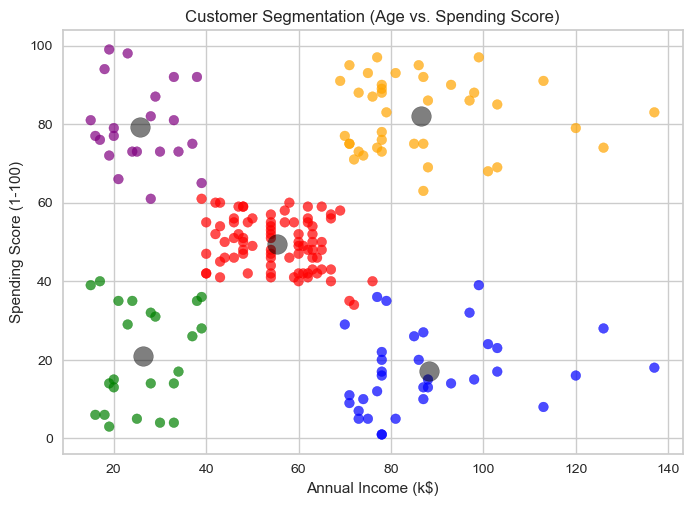

In [56]:
# Create a dictionary to map cluster labels to colors
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'purple', 4: 'orange'}
centers = K_means_model_2.cluster_centers_
# Assuming X1.predicted_clusters contains the cluster labels

# Plot the data points with cluster colors
plt.scatter(X2['Annual Income (k$)'],
            X2['Spending Score (1-100)'],
            c=[cluster_colors[i] for i in df_X2.cluster_Kmeans],  # Use the cluster_colors dictionary
            alpha=0.7)

# Plot the cluster centers (in black, as you've done)
plt.scatter(centers[:, 0],
            centers[:, 1],
            c='black',
            s=200,
            alpha=0.5)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation (Age vs. Spending Score)')
plt.show()


In [57]:
labels={0:'med income med spenders', 1:'high income low spenders', 2:'low income low spenders', 3:'low income high spenders', 4:'high income high spenders'}

X2['Meaningful Labels']=df_X2['cluster_Kmeans'].map(labels)
X2.head()

,Annual Income (k$),Spending Score (1-100),Meaningful Labels
0,15,39,low income low spenders
1,15,81,low income high spenders
2,16,6,low income low spenders
3,16,77,low income high spenders
4,17,40,low income low spenders


### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

In [58]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X=X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [59]:
X = df.copy()

In [60]:
# hopkins(X, 0.1)

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Clustering based on Age and Spending Score- x1

In [62]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

In [63]:
X1 = df[["Age", 'Spending Score (1-100)']]
X1

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


## Since we got a value more than 0.5 we can continue with Clustering

In [64]:
hopkins(X1, 0.1)

0.6413334729901756

In [65]:
hc_ward = linkage(y=X1, method="ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

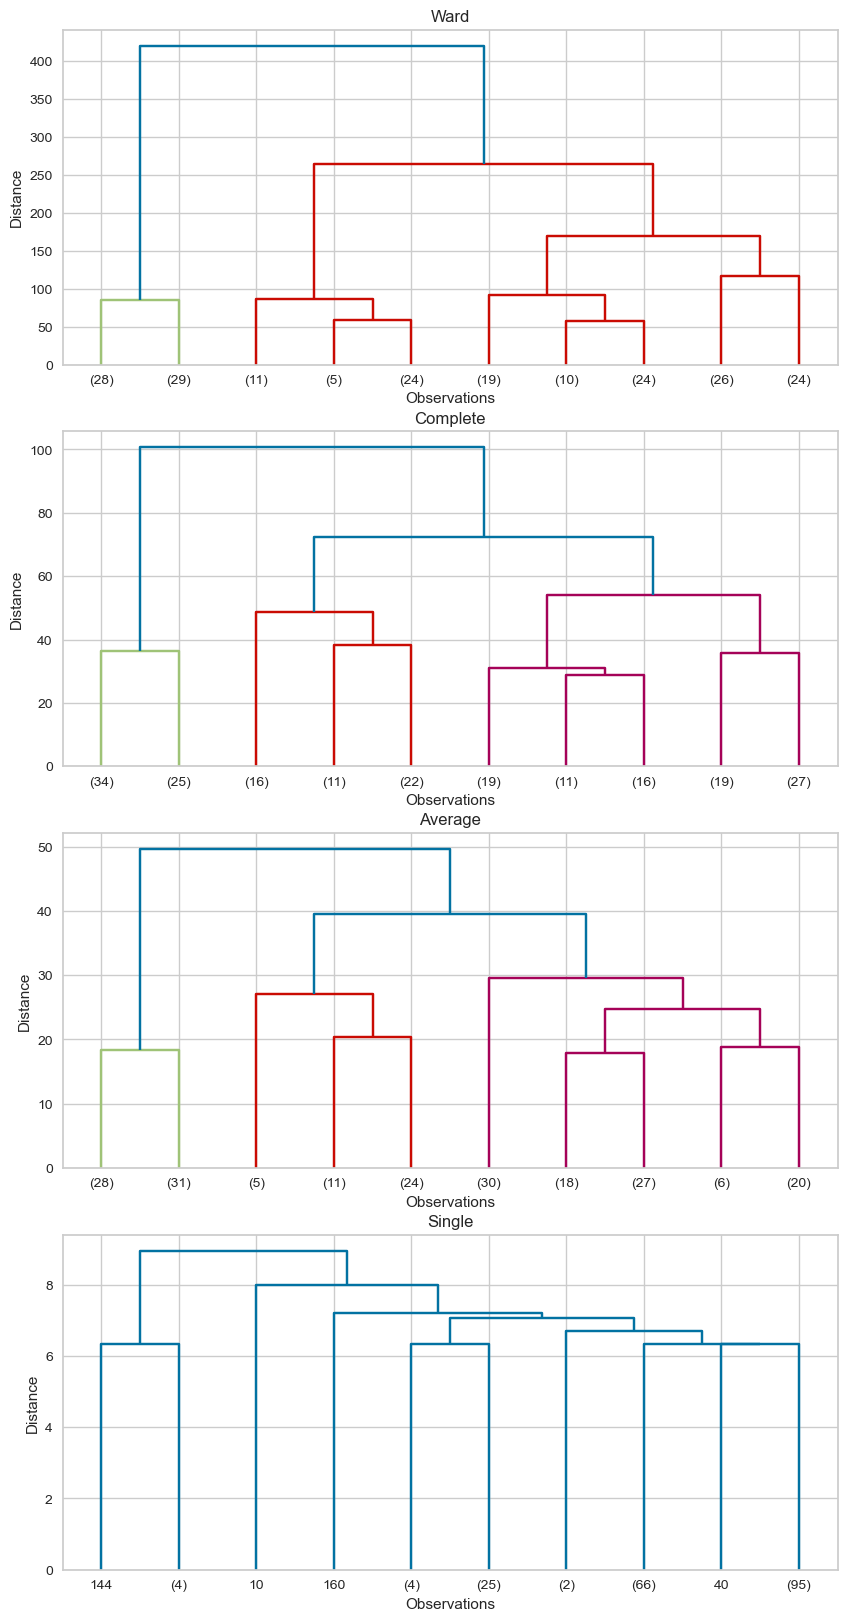

In [66]:
title=['Ward','Complete','Average','Single']
hc=[hc_ward, hc_complete, hc_average, hc_single]

plt.figure(figsize = (10,20))

for i in range(0,4):
      plt.subplot(4, 1, i+1)
      plt.title(title[i])
      plt.xlabel("Observations")
      plt.ylabel("Distance")
      dendrogram(hc[i], leaf_font_size = 10, truncate_mode='lastp', p=10)


In [67]:
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = range(2, 10)

# Silhouette scores
silhouette_ = []

for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    silhouette_.append(silhouette_avg)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091


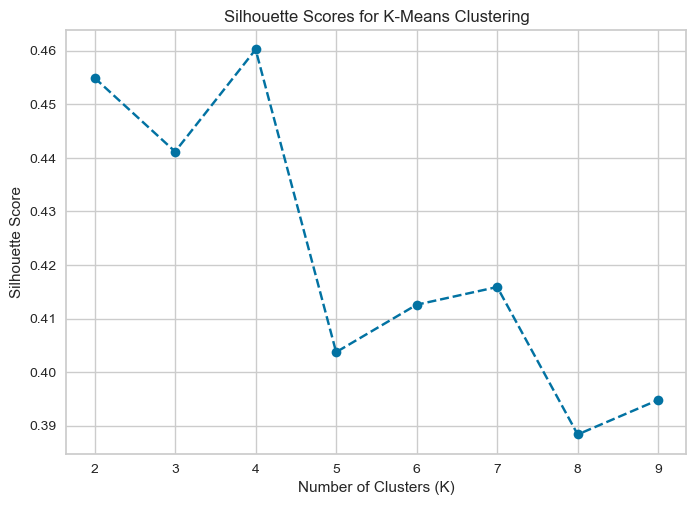

In [68]:
# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_,"bo--")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.show()

## Clustering based on Annual Income and Spending Score- x2

In [69]:
X2 = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X2
# df_3.reset_index()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [70]:
hopkins(X2, 0.1)

0.7386490158063529

## Since we got a value more than 0.5 we can continue with Clustering

In [71]:
hc_ward2 = linkage(y=X2, method="ward")
hc_complete2 = linkage(X2, "complete")
hc_average2 = linkage(X2, "average")
hc_single2 = linkage(X2, "single")

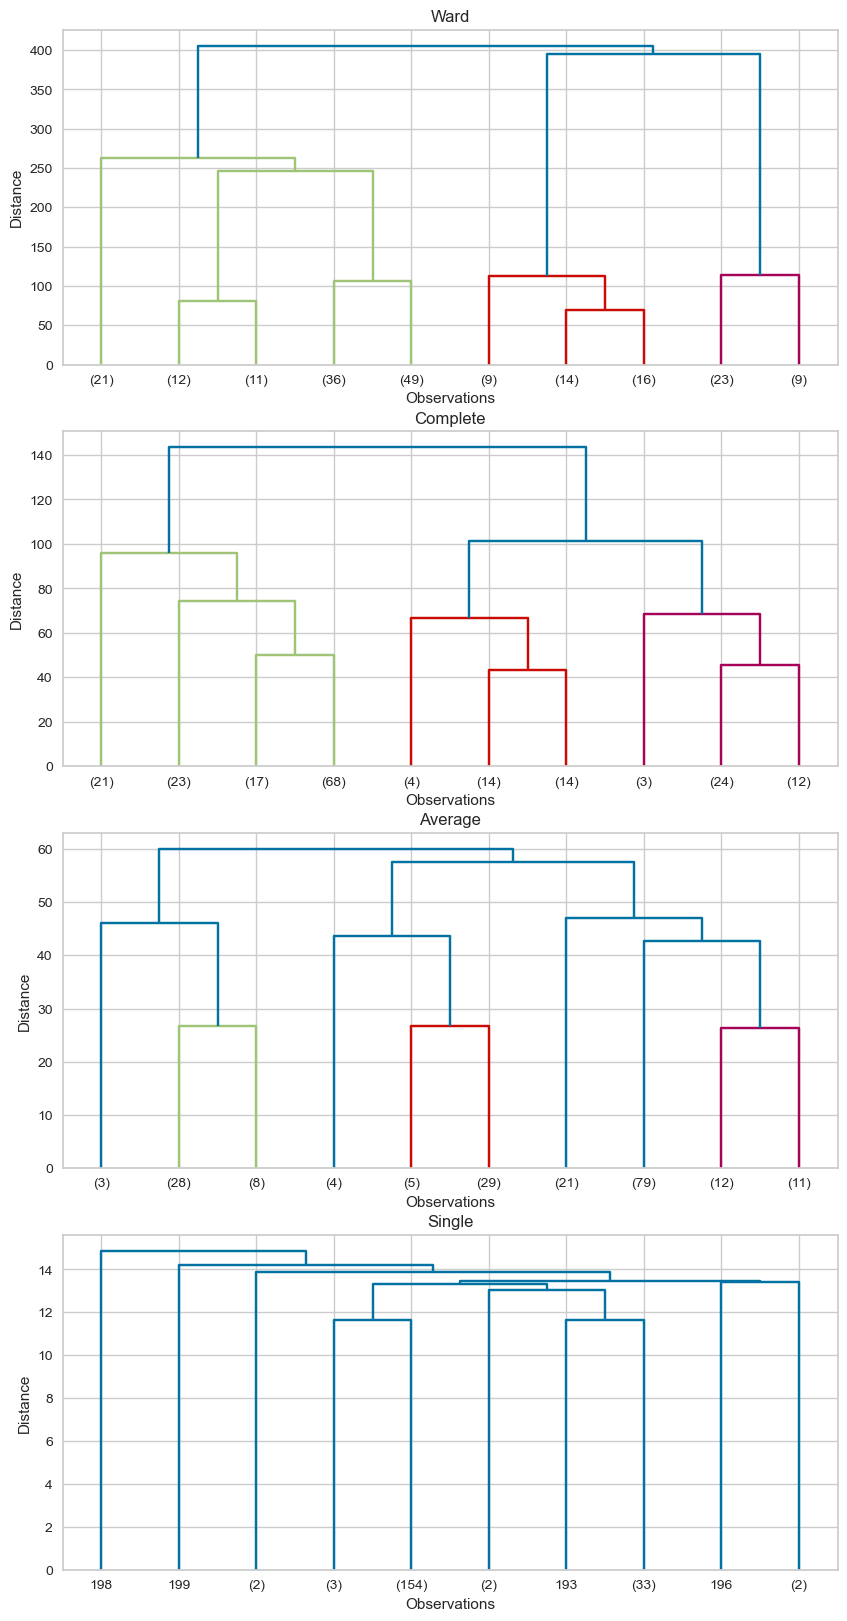

In [72]:
title=['Ward','Complete','Average','Single']
hc=[hc_ward2, hc_complete2, hc_average2, hc_single2]

plt.figure(figsize = (10,20))

for i in range(0,4):
      plt.subplot(4, 1, i+1)
      plt.title(title[i])
      plt.xlabel("Observations")
      plt.ylabel("Distance")
      dendrogram(hc[i], leaf_font_size = 10, truncate_mode='lastp', p=10)


In [73]:
from sklearn.cluster import AgglomerativeClustering

range_n_clusters = range(2, 10)

# Silhouette scores
silhouette_2 = []

for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silhouette_2.append(silhouette_avg)
    print(
        f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}"
    )

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507


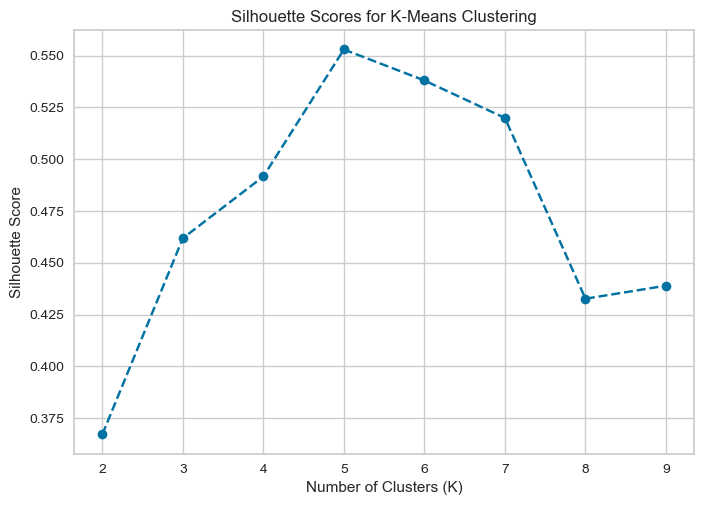

In [74]:
# Plot the silhouette scores
plt.plot(range_n_clusters, silhouette_2,"bo--")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for K-Means Clustering')
plt.show()

### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [75]:
from sklearn.cluster import AgglomerativeClustering

In [76]:
model =  AgglomerativeClustering(n_clusters=4,affinity="euclidean",linkage="ward")
clusters_x1 = model.fit_predict(X1)
clusters_x1

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [77]:
# clusters=model.labels_

In [78]:
df_X1["cluster_Agg"] = clusters_x1
df_X1

,Age,Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


#### Annual Income and Spending Score- x2

In [79]:
X2_model2 = AgglomerativeClustering(n_clusters=5, affinity="euclidean", linkage="ward")
clusters_x2 = X2_model2.fit_predict(X2)
clusters_x2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [80]:
# clusters=X2_model2.labels_

In [81]:
# X2.columns

In [82]:
df_X2["cluster_Agg"] = clusters_x2
df_X2

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [83]:
X1.columns

Index(['Age', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

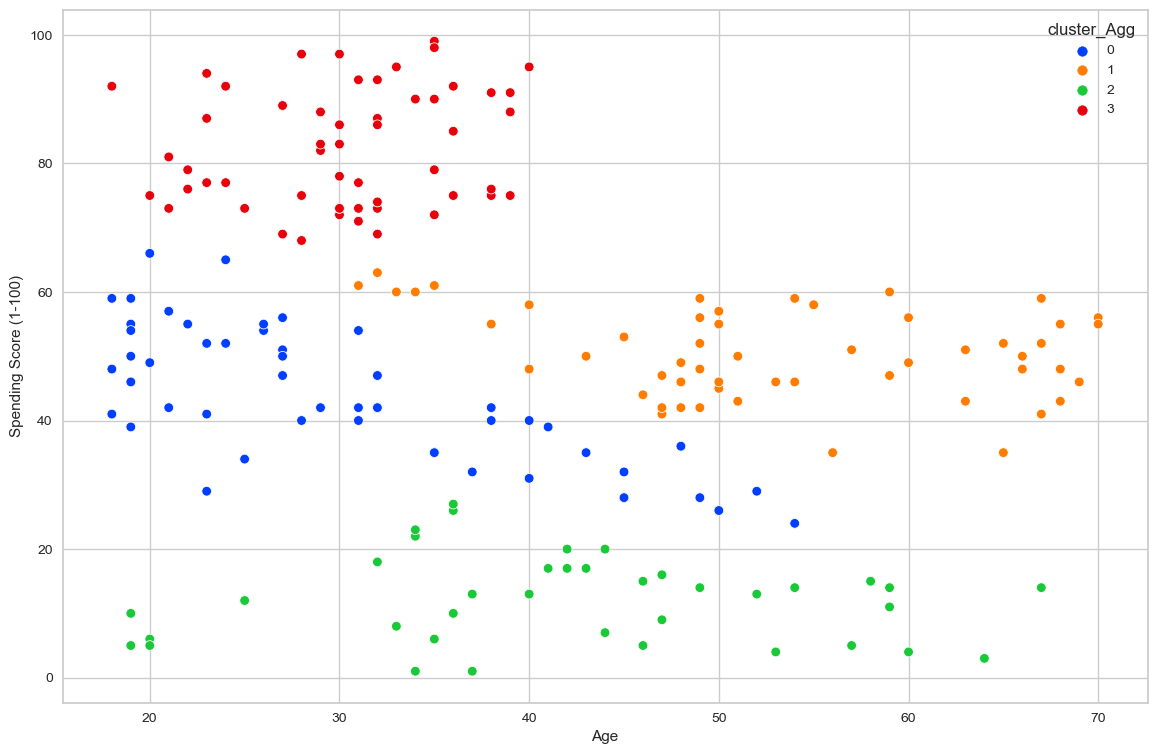

In [84]:
plt.figure(figsize=(14, 9))
sns.scatterplot(x='Age',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_X1,
                palette="bright")

#### Annual Income and Spending Score- x2

In [85]:
X2.columns

Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

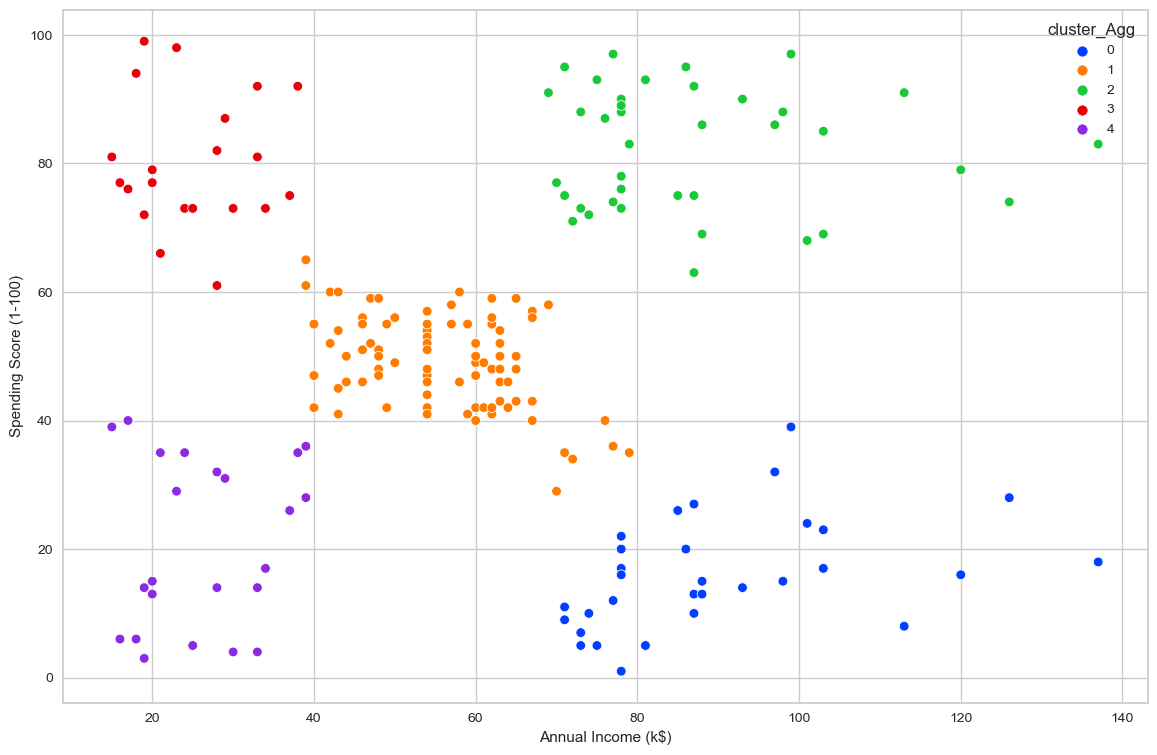

In [86]:
plt.figure(figsize=(14,9))
sns.scatterplot(x='Annual Income (k$)',
                y='Spending Score (1-100)',
                hue='cluster_Agg',
                data=df_X2 ,
                palette="bright")

#### Interpretation based on Age and Spending Score- x1

In [87]:
df_X1

,Age,Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,1,2
3,23,77,2,3
4,31,40,3,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,1,2


In [88]:
df_X1.cluster_Kmeans.value_counts()

2    57
1    48
0    48
3    47
Name: cluster_Kmeans, dtype: int64

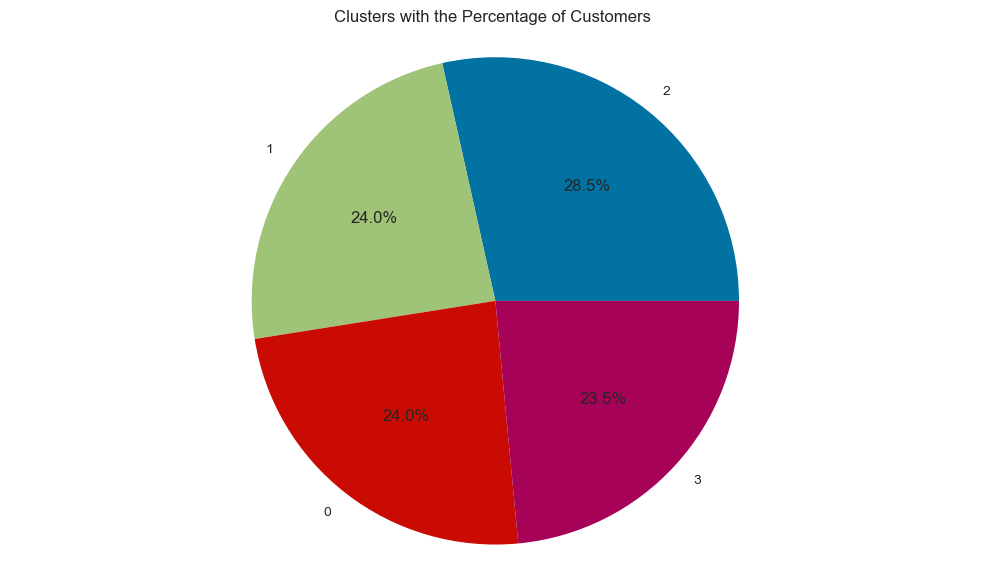

In [89]:
# Get the number of customers in each cluster
cluster_counts = df_X1['cluster_Kmeans'].value_counts()

# Calculate the pie chart slice labels
pie_chart_slice_labels = cluster_counts.index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = cluster_counts.values

# Create a pie chart of the cluster counts
plt.figure(figsize=(10, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Clusters with the Percentage of Customers")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()
plt.show()


In [90]:
df["cluster_Age_Spending_Score"] = df_X1.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,1
3,Female,23,16,77,2
4,Female,31,17,40,3


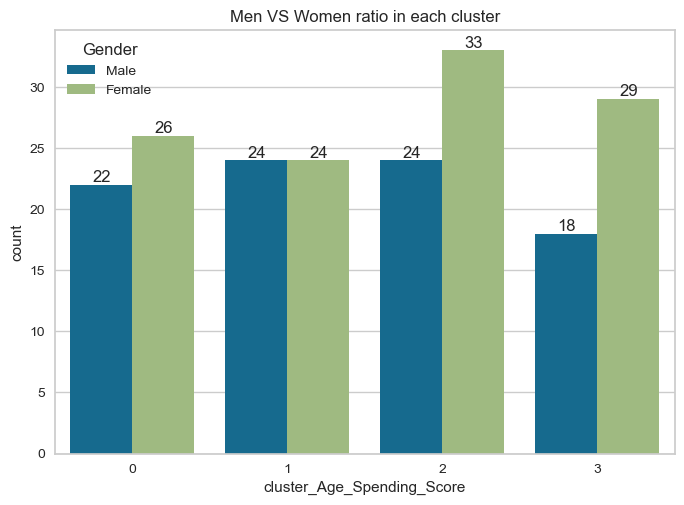

In [91]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

In [92]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual Income (k$),Spending Score (1-100)
cluster_Age_Spending_Score,,,
0,55.708333,54.770833,48.229167
1,43.291667,66.937500,15.020833
2,30.175439,66.070175,82.350877
3,27.617021,53.276596,49.148936


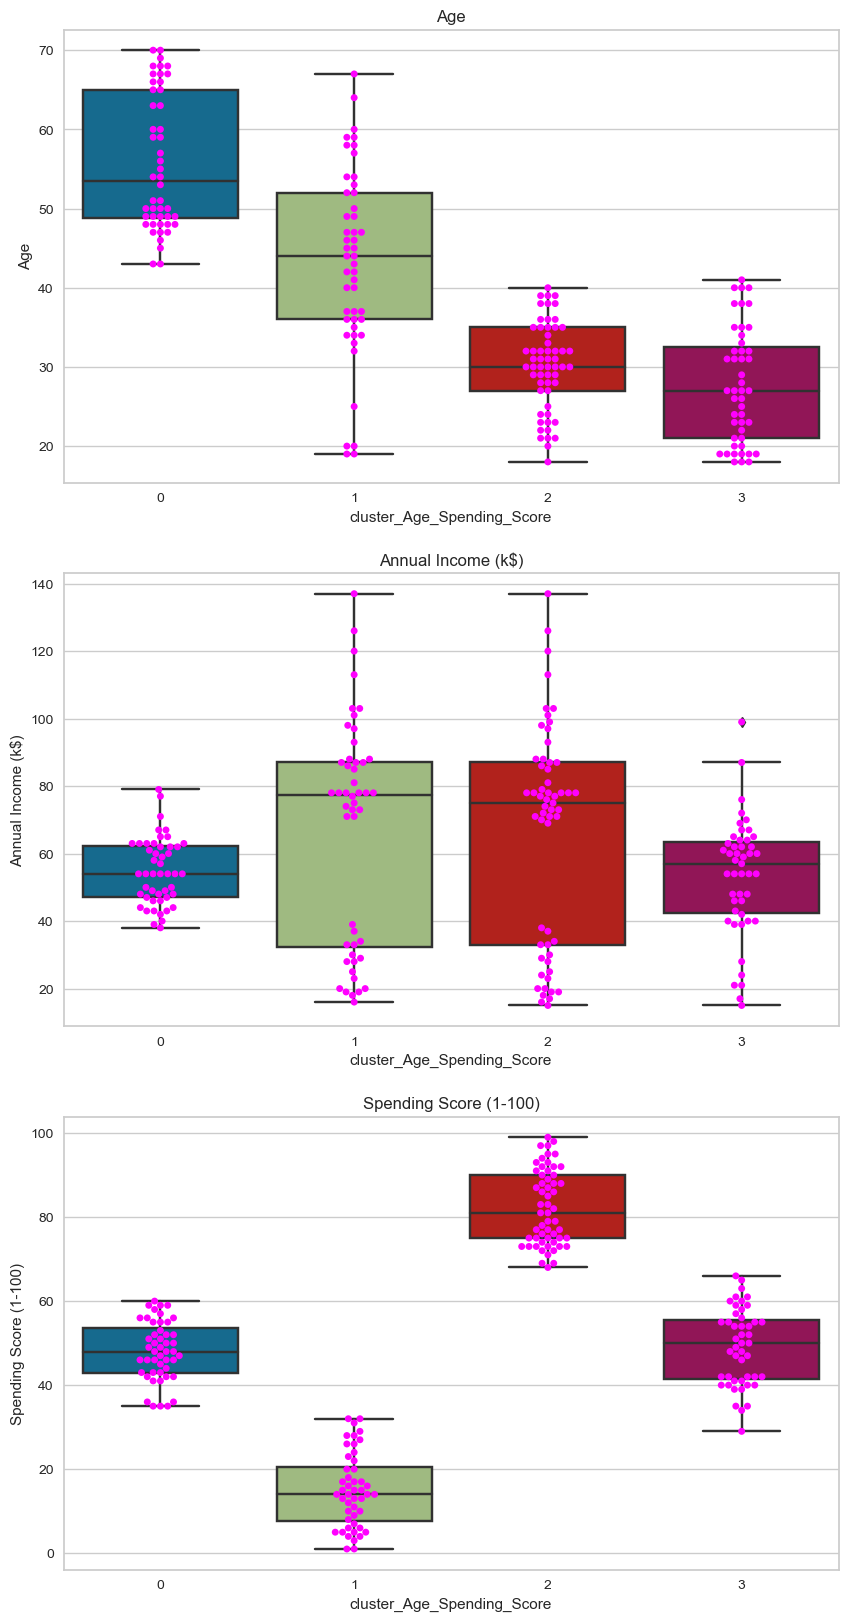

In [93]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(10, 20))

for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      sns.boxplot(y=column[i], x="cluster_Age_Spending_Score", data=df)
      sns.swarmplot(y=column[i], x="cluster_Age_Spending_Score",data=df,color="magenta")

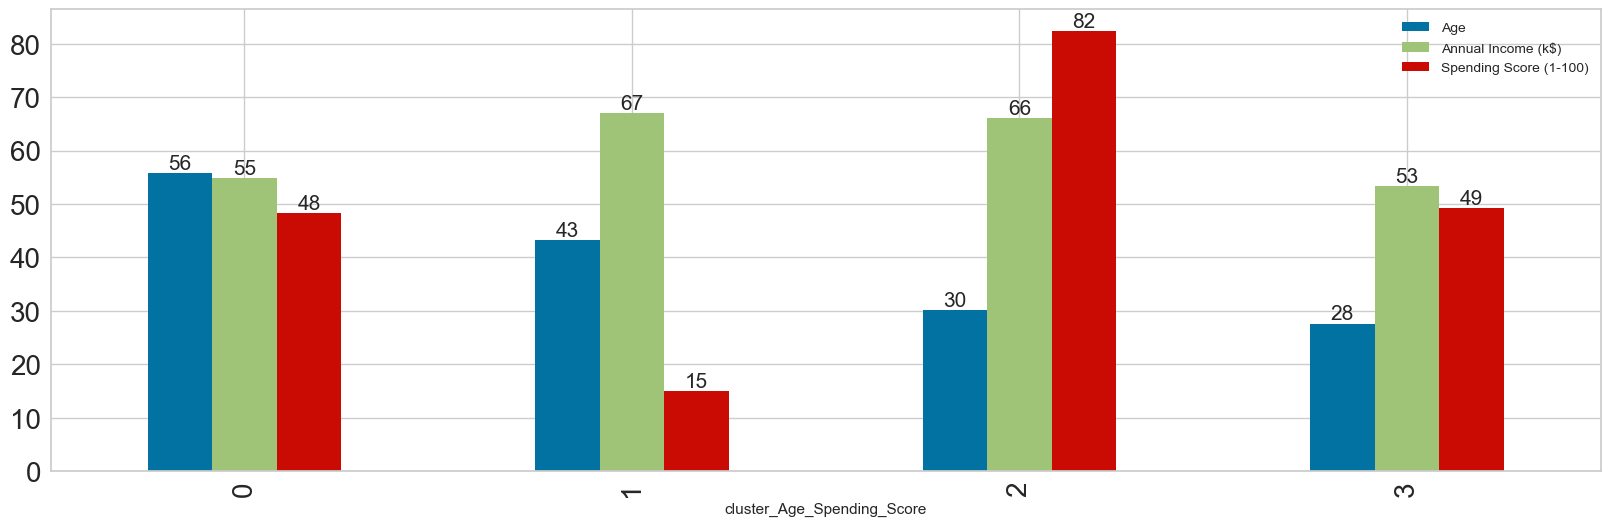

In [94]:
ax = df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar',
                                                          figsize=(20, 6),
                                                          fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=15)

### Conclusion

**cluster 0** : The average age is around 56. both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 43. the annula_income is high but the spending_scores are very low.
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high.
This group consists of our loyal customers. Our company derives the main profit from this group. Very
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 28. Both annula_income and spending_scores are on average.
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [95]:
df_X2

,Annual Income (k$),Spending Score (1-100),cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [96]:
df_X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

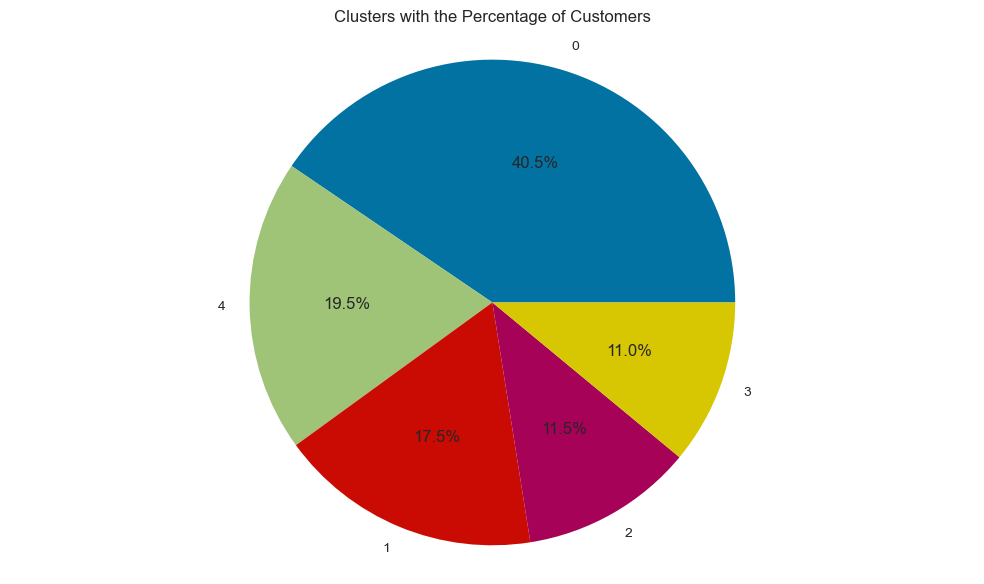

In [97]:
# Get the number of customers in each cluster
cluster_counts = df_X2['cluster_Kmeans'].value_counts()

# Calculate the pie chart slice labels
pie_chart_slice_labels = cluster_counts.index.to_numpy()

# Get pie chart slice values
pie_chart_slice_values = cluster_counts.values

# Create a pie chart of the cluster counts
plt.figure(figsize=(10, 6))
plt.pie(pie_chart_slice_values, labels=pie_chart_slice_labels, autopct="%1.1f%%")
plt.title("Clusters with the Percentage of Customers")
plt.axis('equal')  # Equal aspect ratio ensures a circular pie chart
plt.tight_layout()
plt.show()

In [98]:
df.drop(columns="cluster_Age_Spending_Score", inplace=True)

In [99]:
df["cluster_Annual_Income_Spending_Score"] = df_X2.cluster_Kmeans
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


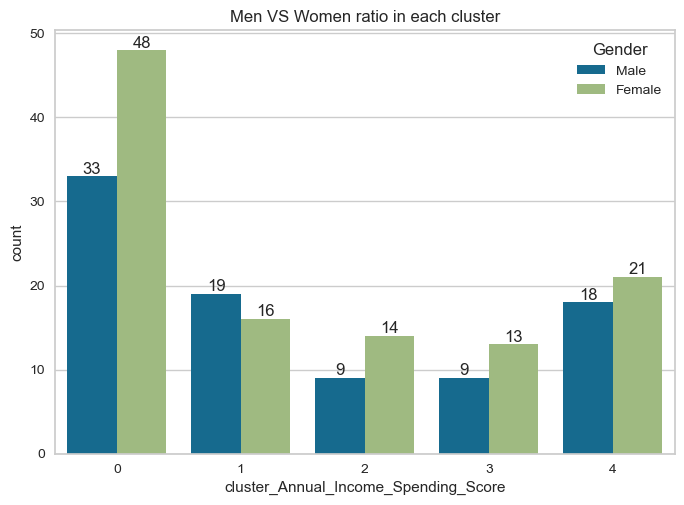

In [100]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")

ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

In [101]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual Income (k$)  \
Gender cluster_Annual_Income_Spending_Score                                  
Female 0                                     40.895833           55.354167   
       1                                     43.250000           90.937500   
       2                                     43.214286           27.357143   
       3                                     25.461538           25.692308   
       4                                     32.190476           86.047619   
Male   0                                     45.363636           55.212121   
       1                                     39.315789           85.894737   
       2                                     48.333333           24.666667   
       3                                     25.000000           25.777778   
       4                                     33.277778           87.111111   

                                             Spending Score (1-100)  
Gender cluster_Annual_Income_Spending_Score                          
Female 0                                                  49.000000  
       1                                                  22.062500  
       2                                                  21.714286  
       3                                                  80.538462  
       4                                                  81.666667  
Male   0                                                  50.272727  
       1                                                  12.947368  
       2                                                  19.666667  
       3                                                  77.666667  
       4                                                  82.666667

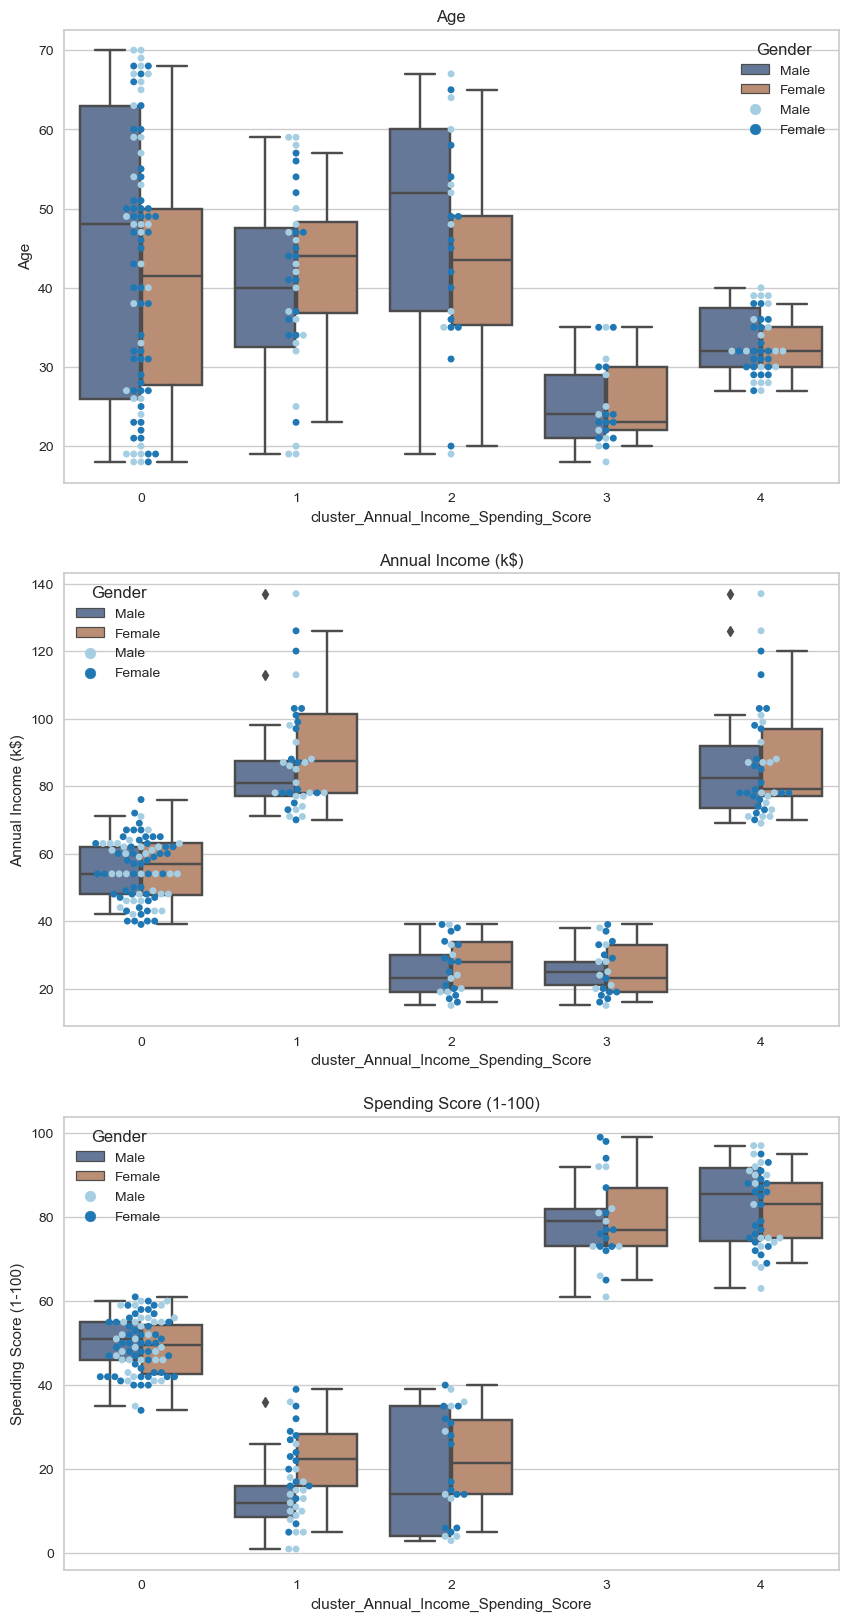

In [102]:
column=['Age', 'Annual Income (k$)','Spending Score (1-100)']
plt.figure(figsize=(10, 20))

for i in range(0,3):
      plt.subplot(3, 1, i+1)
      plt.title(column[i])
      sns.boxplot(y=column[i], x="cluster_Annual_Income_Spending_Score",
            hue= "Gender", data = df,palette="deep",saturation=0.5)
      sns.swarmplot(y = column[i], x = "cluster_Annual_Income_Spending_Score",
              hue= "Gender", data = df,palette=sns.color_palette("Paired"))

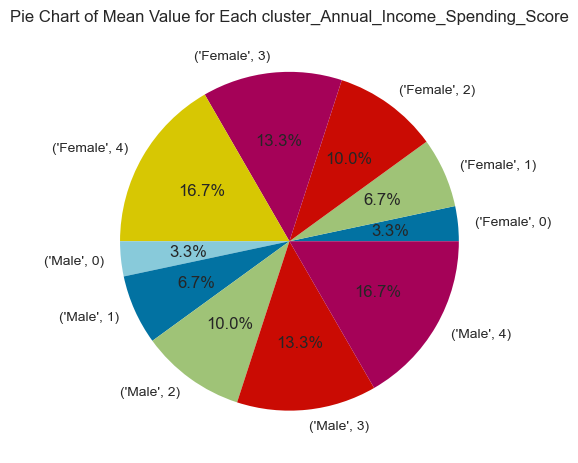

In [103]:
df2 = pd.DataFrame({'Gender': ['Male', 'Male', 'Male', 'Male', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female'],
                   'cluster_Annual_Income_Spending_Score': [0,1, 2, 3, 4 ,0,1, 2, 3, 4],
                   'value': [100, 200, 300, 400,500, 100, 200, 300, 400,500]})

# Group the data by cluster_Annual_Income_Spending_Score and calculate the mean
grouped_data = df2.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

# Create a pie chart of the mean value for each cluster_Annual_Income_Spending_Score
plt.pie(grouped_data["value"], labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Pie Chart of Mean Value for Each cluster_Annual_Income_Spending_Score")
plt.show()

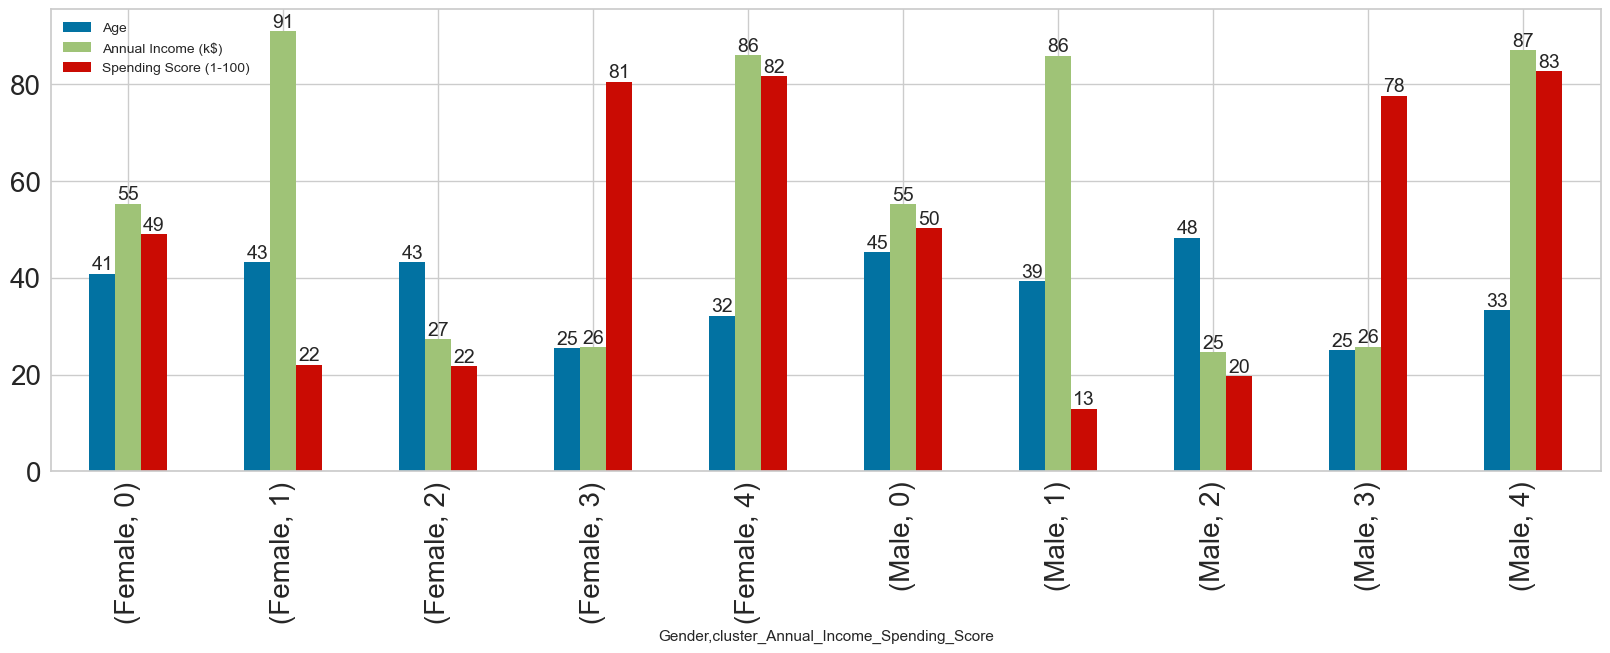

In [104]:
ax = df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar",
                                                                                figsize=(20,6),
                                                                                fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

## Conclusion

### Female

**cluster 0** : The average age is around 41, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 43, the annual_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 43. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 32, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 39, the annual_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 48. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group.
Very special promotions can be made in order not to miss it.

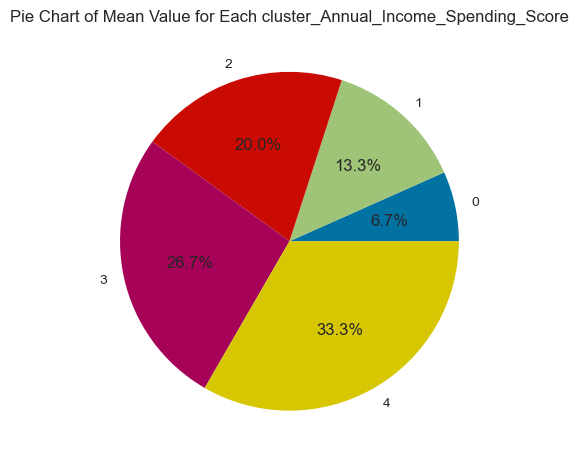

In [105]:
df2 = pd.DataFrame({'cluster_Annual_Income_Spending_Score': [0,1, 2, 3, 4 ],
                   'value': [100, 200, 300, 400,500]})

# Group the data by cluster_Annual_Income_Spending_Score and calculate the mean
grouped_data = df2.groupby(["cluster_Annual_Income_Spending_Score"]).mean()

# Create a pie chart of the mean value for each cluster_Annual_Income_Spending_Score
plt.pie(grouped_data["value"], labels=grouped_data.index, autopct="%1.1f%%")
plt.title("Pie Chart of Mean Value for Each cluster_Annual_Income_Spending_Score")
plt.show()

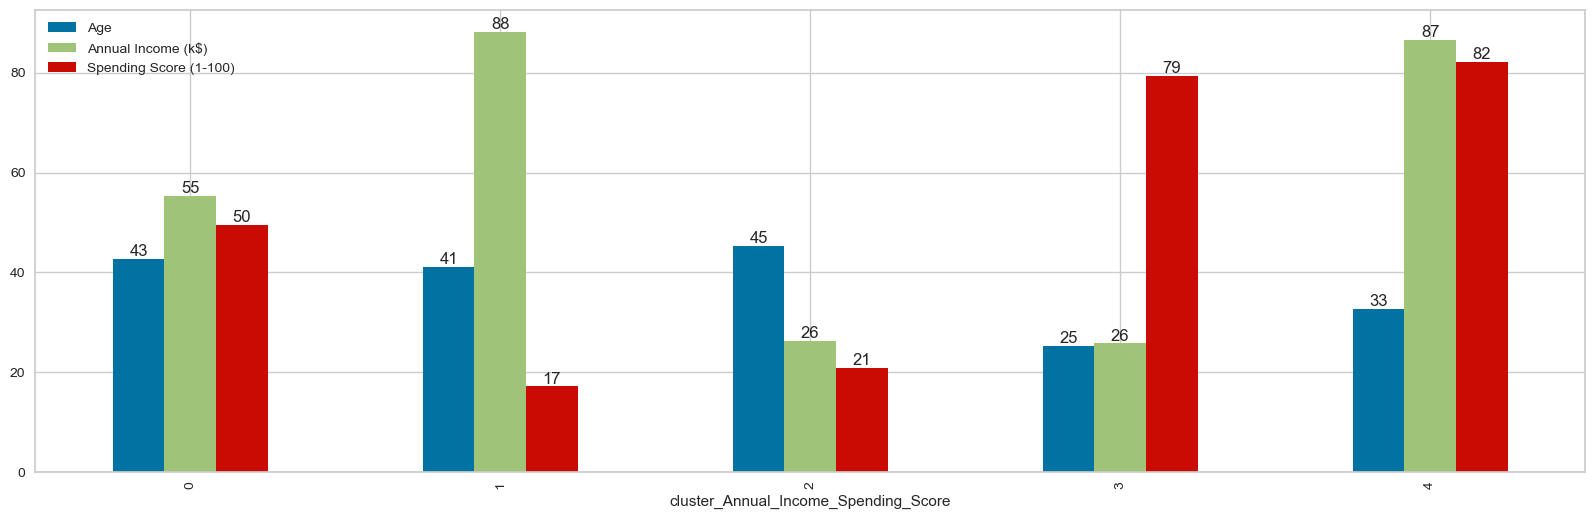

In [106]:
ax = df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar', figsize = (20,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f")

**cluster 0** : The average age is around 43, both annual_income and spending_scores are on average.
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 41, the annual_income is very high but the spending_scores is very low. This group is our target audience and special strategies need to be developed for this group.

**cluster 2** :The average age is around 45. Both annual_income and spending_scores are low. It can be
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 33, the annual income and the spending_score is very high. This group consists of our loyal customers. Our company derives the main profit from this group. Very special promotions can be made in order not to miss it.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___